### The goal of this XP:
- Create a functional template image with better color contrast for visual inspection on zooniverse platform - Brain Match
- Remove black background in anatomical individual image and overly it with the fonctional one

In [1]:
clear all
% build path
addpath(genpath('../Misc'))
build_path  niak psom zooniverse_qc  

Adding library niak to the search path.

Adding library psom to the search path.

Adding library zooniverse_qc to the search path.



In [2]:
% Set parameters
path_root = '/home/yassinebha/Drive/QC_zooniverse/';
#path_root = '/media/yassinebha/database29/Drive/QC_zooniverse/';

# Invert BOLD template contrast

In [72]:
# Alpply non uniformity corretion first
files_in.vol = [path_root 'template_layout/test_data/group_coregistration/func_mean_average_stereonl.nii.gz'];
files_in.mask = [path_root 'template_layout/test_data/group_coregistration/func_mask_group_stereonl.nii.gz'];
files_out.vol_nu = '';
files_out.vol_imp = '';
opt.folder_out = [path_root 'template_layout/test_data/group_coregistration/'];
[files_in,files_out,opt] = niak_brick_nu_correct(files_in,files_out,opt);

    niak_set_defaults at line 102 column 31
    niak_brick_nu_correct at line 140 column 1

*****************************************
Non-uniformity correction on an MR volume
*****************************************
Copying or converting file /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/group_coregistration/func_mean_average_stereonl.nii.gz to /tmp/niak_tmp_91363995_func_mean_average_stereonl/vol.mnc
Copying or converting file /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/group_coregistration/func_mask_group_stereonl.nii.gz to /tmp/niak_tmp_91363995_func_mean_average_stereonl/mask.mnc
Running NU_CORRECT with the following command:
nu_correct -clobber -tmpdir /tmp/niak_tmp_91363995_func_mean_average_stereonl/ -distance 200 -mask /tmp/niak_tmp_91363995_func_mean_average_stereonl/mask.mnc /tmp/niak_tmp_91363995_func_mean_average_stereonl/vol.mnc /tmp/niak_tmp_91363995_func_mean_average_stereonl/vol_nu.mnc

Transforming slices:..............Done
Process

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


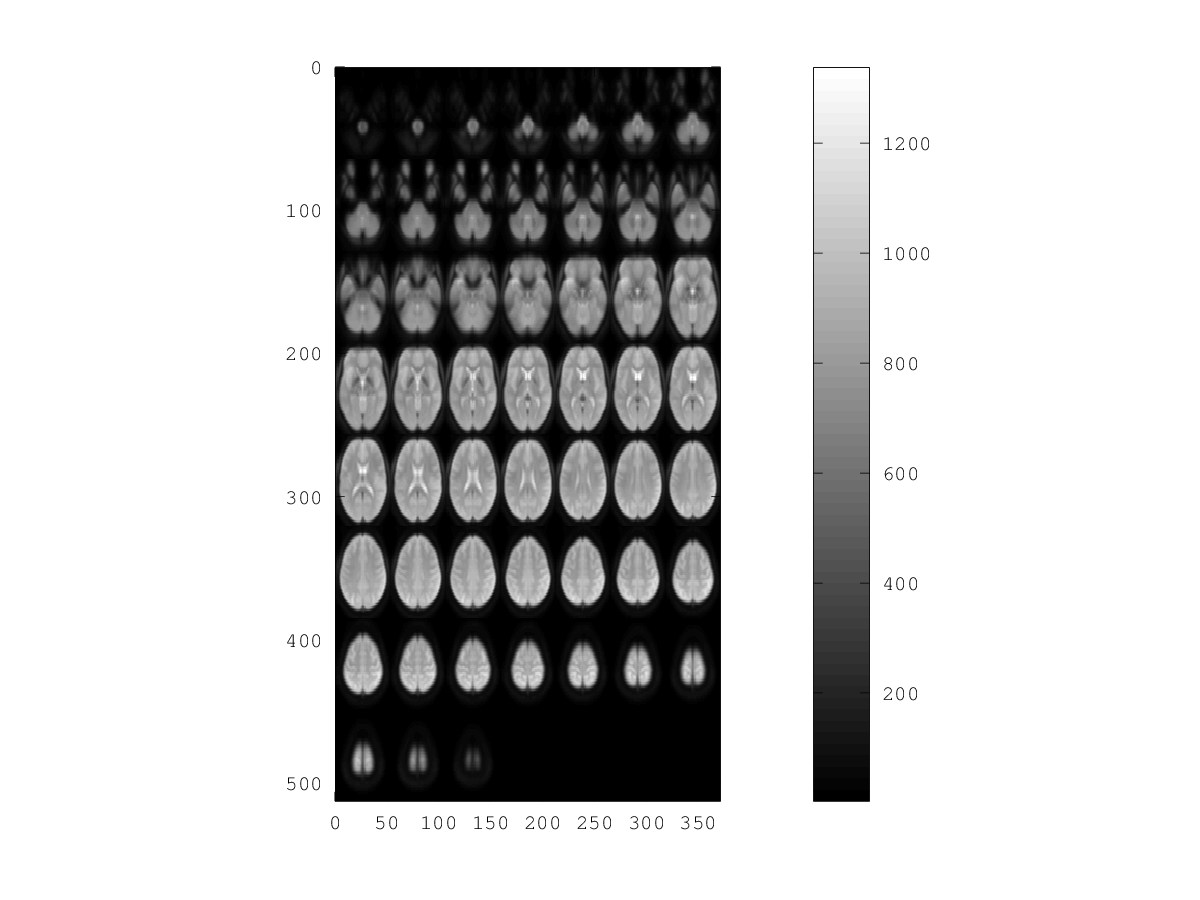

In [73]:
# Dispaly images
[hdr,vol] = niak_read_vol(files_out.vol_nu);
[hdr,vol_raw] = niak_read_vol(files_in.vol);
opt.type_color = 'gray';
niak_montage(vol_raw,opt)

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


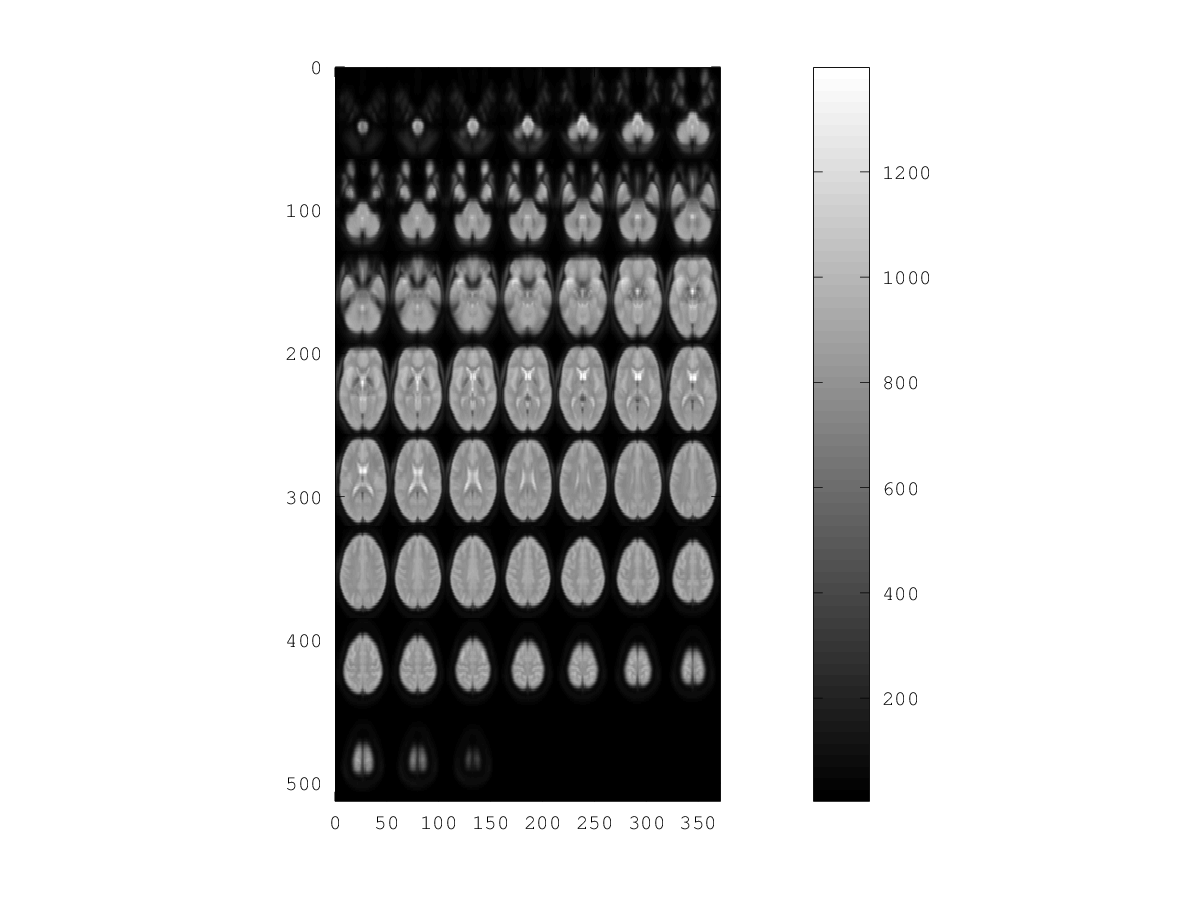

In [74]:
# After correction
niak_montage(vol,opt)

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


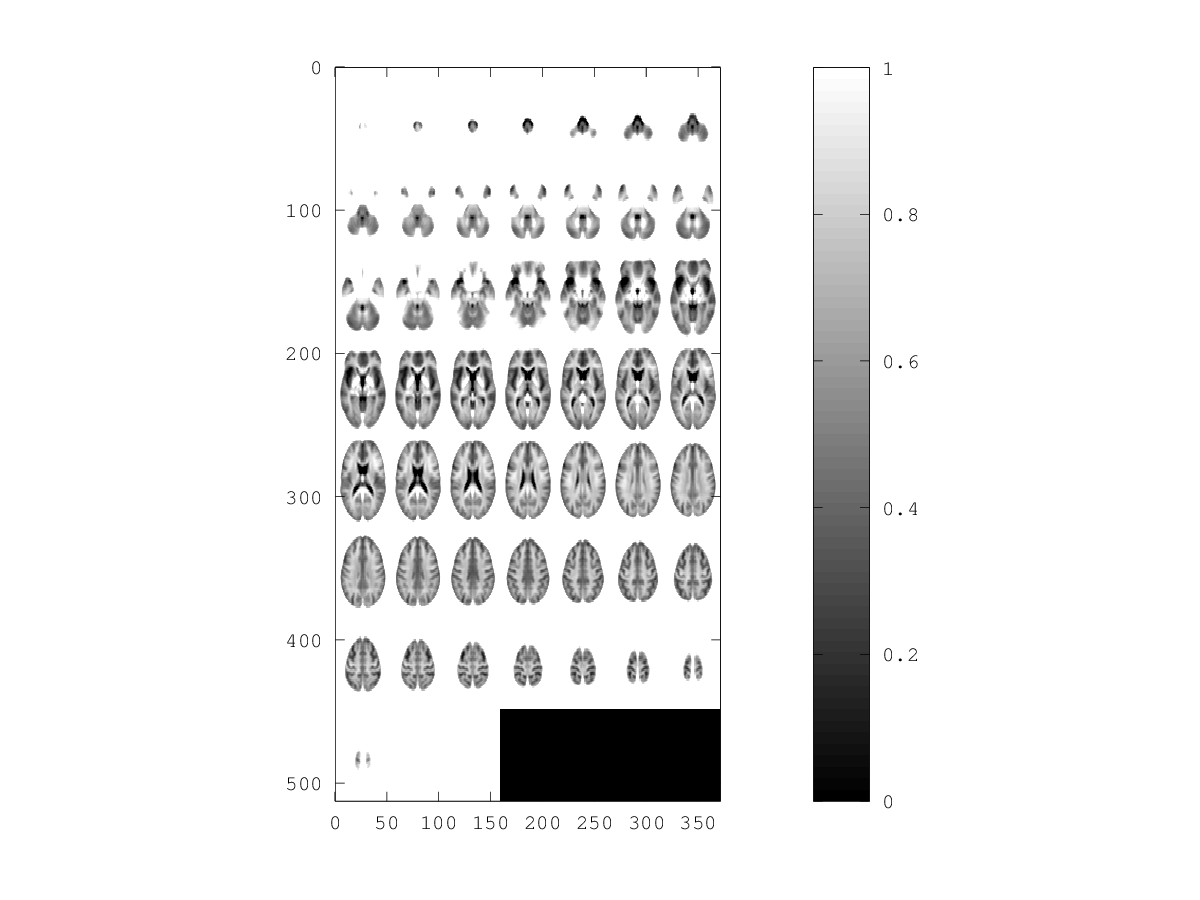

In [75]:
% Invert contrast
[hdr,vol] = niak_read_vol(files_out.vol_nu);
[hdr,mask] = niak_read_vol(files_in.mask);
param.transparency = 0.7;
param.perc_min = 0.18;
param.perc_max = 0.99;

mask = mask>0;
val = sort(vol(mask),'ascend');
vmin = val(round(param.perc_min*length(val)));
vmax = val(round(param.perc_max*length(val)));
vol(vol<vmin) = vmin;
vol(vol>vmax) = vmax;
vol(mask) = (vol(mask) - vmin)/(vmax-vmin);
vol(~mask) = 0;
vol = 1 - vol;
vol = (abs(vol));
niak_montage(vol,opt)
hdr.file_name = [path_root 'template_layout/test_data/func_mean_average_stereonl_inv.nii.gz'];
niak_write_vol(hdr,vol);

### Create montage of the func template image

In [76]:
clear jin jout jopt
% Input
niak_gb_vars
jin.source = [path_root 'template_layout/test_data/func_mean_average_stereonl_inv.nii.gz'];
jin.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_sym_09a.mnc.gz'];

% Output
jout = [path_root 'template_layout/test_data/func_mean_average_stereonl.png'];

% Options
jopt.colormap = 'gray';
jopt.colorbar = false;
jopt.limits = 'adaptative';
jopt.flag_decoration = false;
jopt.padding = true;
jopt.coord =[-30 , -65 , -6 ; 
             -8 , -25 ,  10 ;  
             30 ,  45 ,  60];
             
% The generation of the montage itself
niak_brick_vol2img(jin,jout,jopt);

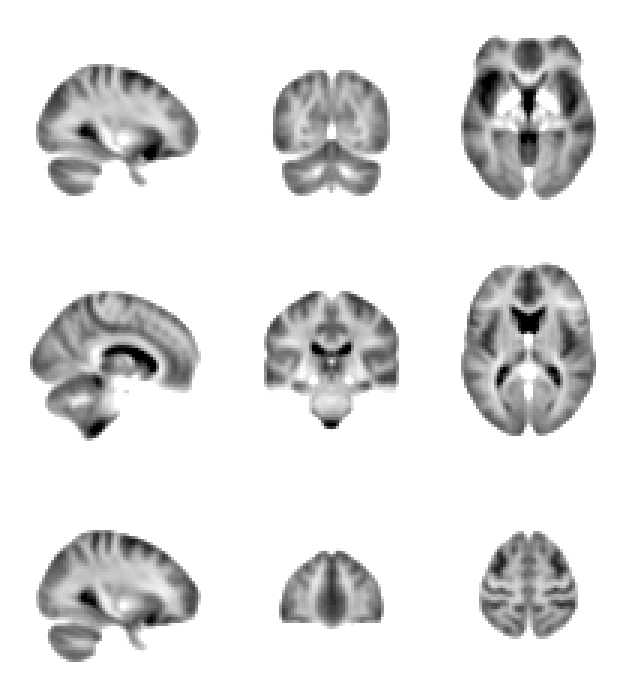

In [77]:
imshow([path_root 'template_layout/test_data/func_mean_average_stereonl.png'])

### Add outline as overlay to func template

In [78]:
%% Add overlay to func 
clear jin jout jopt
param.transparency = 0.7;
jin.background =  [path_root 'template_layout/test_data/func_mean_average_stereonl.png'];
jin.overlay = [path_root 'template_layout/layout/mask_layout/mask_all_layout_v2_smoothed.png'];
jout = [path_root 'template_layout/test_data/func_mean_average_stereonl_outline.png'];
jopt.transparency = param.transparency;
jopt.threshold = 0.9;
niak_brick_add_overlay(jin,jout,jopt);

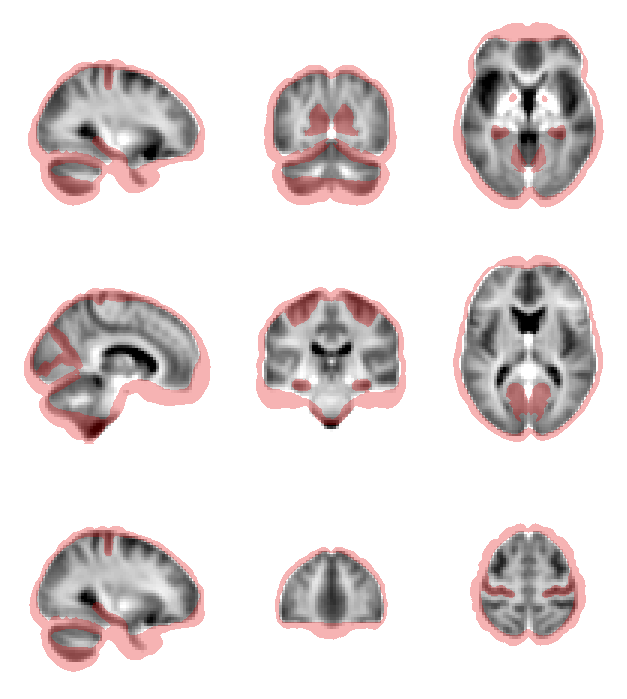

In [79]:
imshow([path_root 'template_layout/test_data/func_mean_average_stereonl_outline.png'])

# Invert a subject BOLD contrast

In [4]:
# Alpply non uniformity corretion first
clear  files_in files_out opt
files_in.vol = [path_root 'template_layout/test_data/X_0015002/func_X_0015002_mean_stereolin.nii.gz'];
files_in.mask = [path_root 'template_layout/test_data/func_mask_group_stereonl.nii.gz'];
files_out.vol_nu = '';
files_out.vol_imp = '';
opt.folder_out = [path_root 'template_layout/test_data/X_0015002/'];
[files_in,files_out,opt] = niak_brick_nu_correct(files_in,files_out,opt);


*****************************************
Non-uniformity correction on an MR volume
*****************************************
Copying or converting file /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/X_0015002/func_X_0015002_mean_stereolin.nii.gz to /tmp/niak_tmp_334828965_func_X_0015002_mean_stereolin/vol.mnc
Copying or converting file /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/func_mask_group_stereonl.nii.gz to /tmp/niak_tmp_334828965_func_X_0015002_mean_stereolin/mask.mnc
Running NU_CORRECT with the following command:
nu_correct -clobber -tmpdir /tmp/niak_tmp_334828965_func_X_0015002_mean_stereolin/ -distance 200 -mask /tmp/niak_tmp_334828965_func_X_0015002_mean_stereolin/mask.mnc /tmp/niak_tmp_334828965_func_X_0015002_mean_stereolin/vol.mnc /tmp/niak_tmp_334828965_func_X_0015002_mean_stereolin/vol_nu.mnc

Transforming slices:.............Done
Processing:.............Done
Processing:.............Done
Processing:.............Done
Processing:......

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


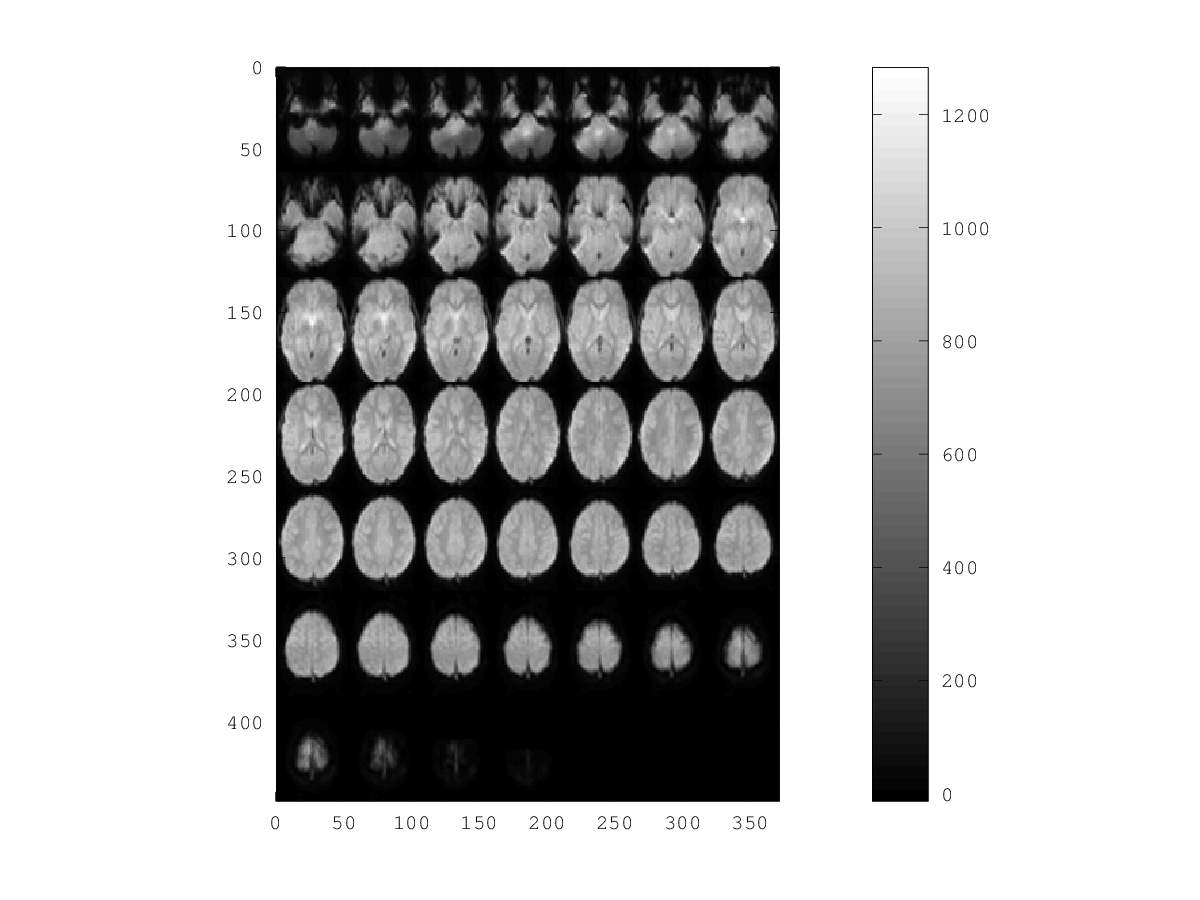

In [5]:
# Dispaly images
[hdr,vol] = niak_read_vol(files_out.vol_nu);
[hdr,vol_raw] = niak_read_vol(files_in.vol);
opt.type_color = 'gray';
niak_montage(vol_raw,opt)

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


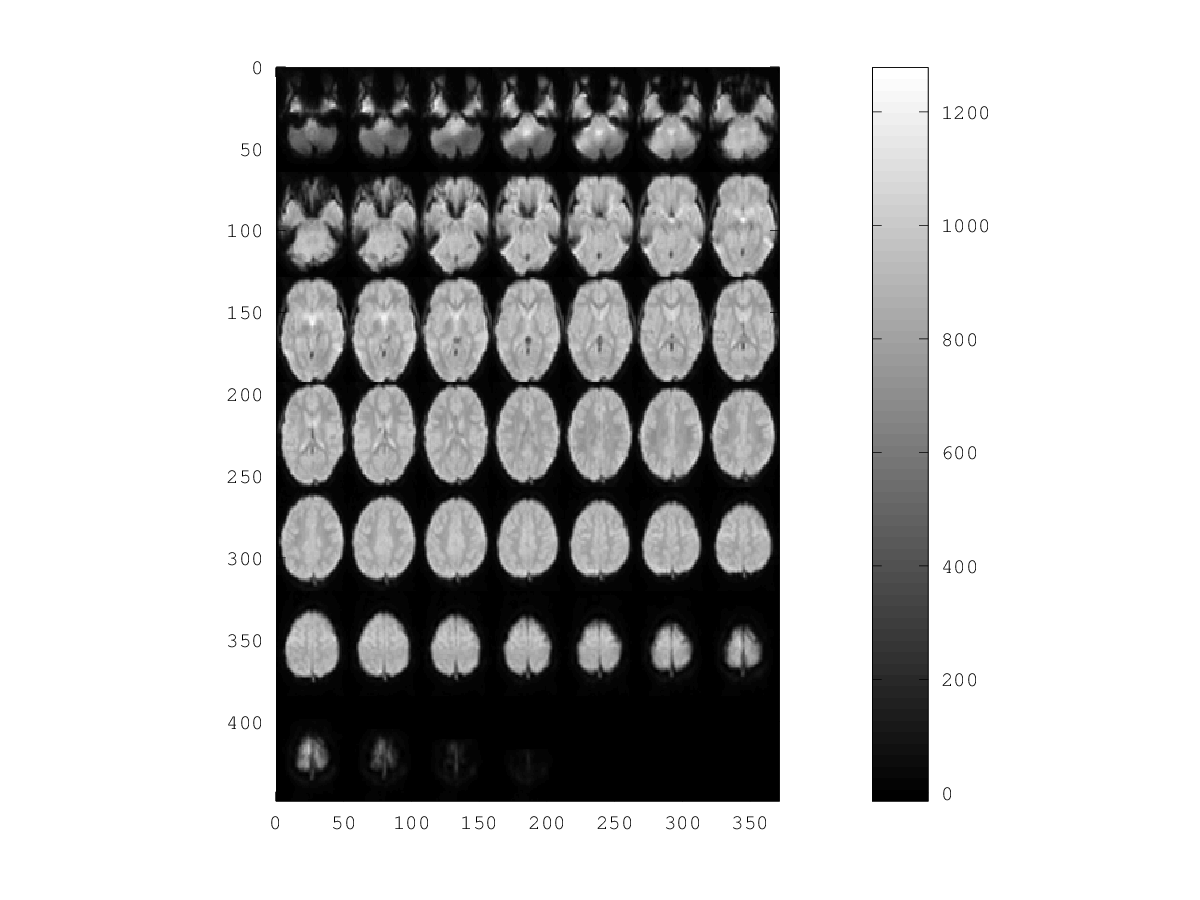

In [6]:
# After correction
niak_montage(vol,opt)

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


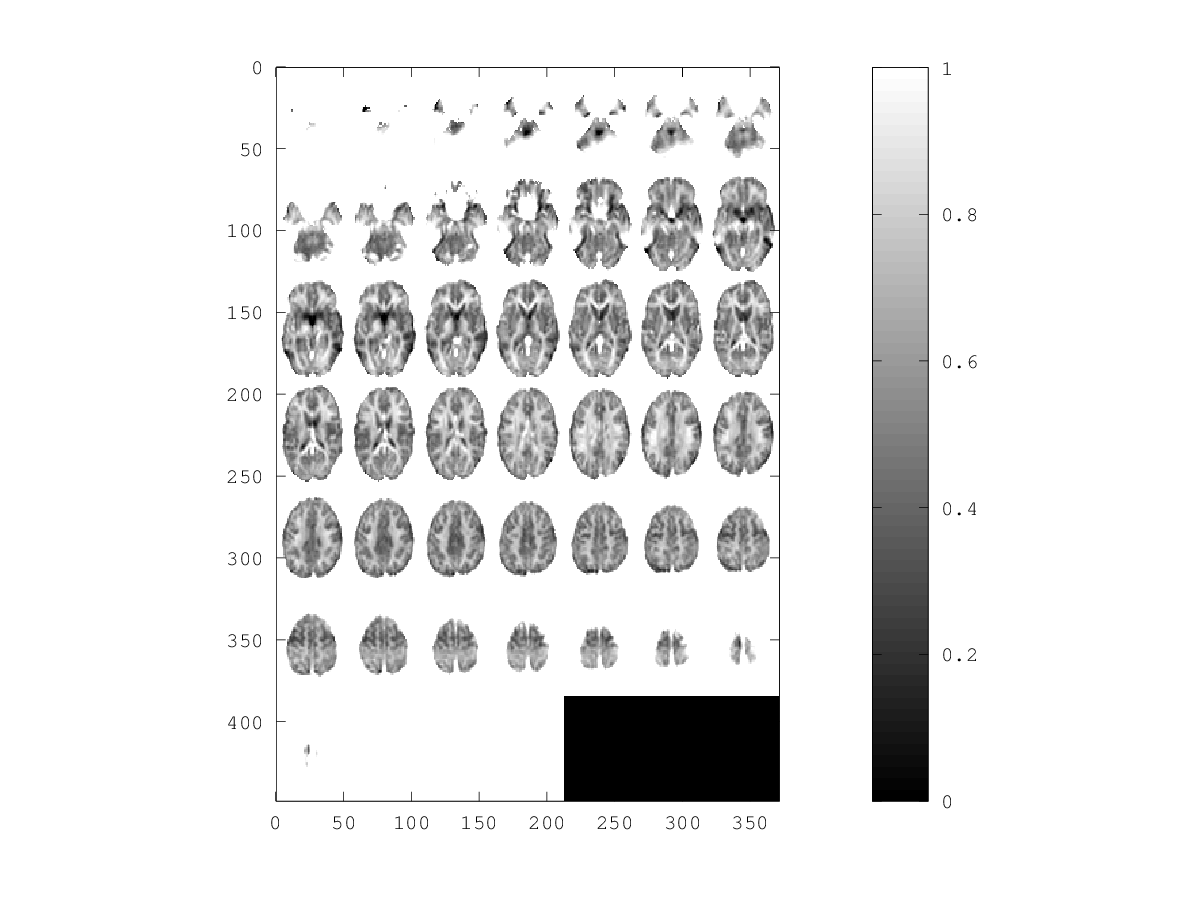

In [7]:
% Invert contrast
[hdr,vol] = niak_read_vol(files_out.vol_nu);
[hdr,mask] = niak_read_vol(files_in.mask);
param.perc_min = 0.13;
param.perc_max = 0.999;

mask = mask>0;
val = sort(vol(mask),'ascend');
vmin = val(round(param.perc_min*length(val)));
vmax = val(round(param.perc_max*length(val)));
vol(vol<vmin) = vmin;
vol(vol>vmax) = vmax;
vol(mask) = (vol(mask) - vmin)/(vmax-vmin);
vol(~mask) = 0;
vol = 1 - vol;
vol = (abs(vol));
niak_montage(vol,opt)
hdr.file_name = [path_root 'template_layout/test_data/X_0015002/func_X_0015002_mean_stereonl_inv.nii.gz'];
niak_write_vol(hdr,vol);

### Create montage from subject func inverted image

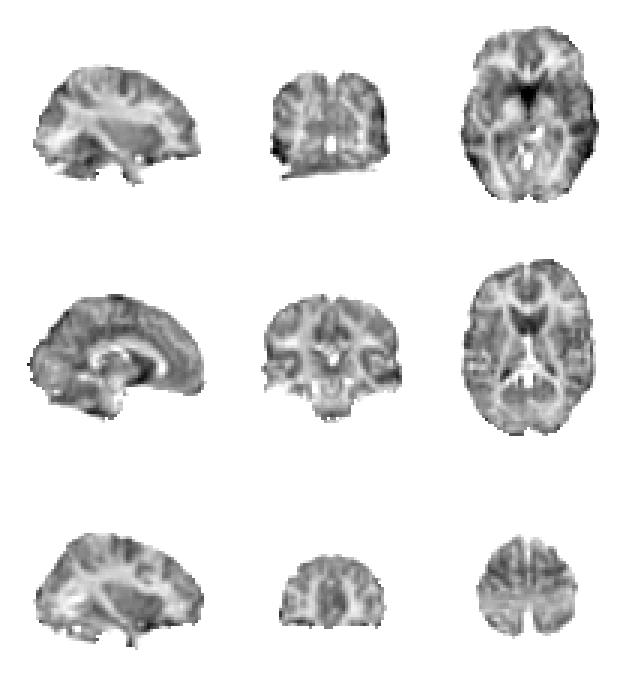

In [12]:
% Create montage for the image
clear jin jout jopt
niak_gb_vars
% Input
jin.source = [path_root 'template_layout/test_data/X_0015002/func_X_0015002_mean_stereonl_inv.nii.gz'];
jin.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_sym_09a.mnc.gz'];

% Output
jout = [path_root 'template_layout/test_data/X_0015002/func_X_0015002_mean_stereonl.png'];

% Options
jopt.colormap = 'gray';
jopt.colorbar = false;
jopt.limits = 'adaptative';
jopt.flag_decoration = false;
jopt.padding = true;
jopt.coord =[-30 , -65 , -6 ; 
             -8 , -25 ,  10 ;  
             30 ,  45 ,  60];
             
% The generation of the montage itself
niak_brick_vol2img(jin,jout,jopt);
imshow(jout)

### Add layout overlay

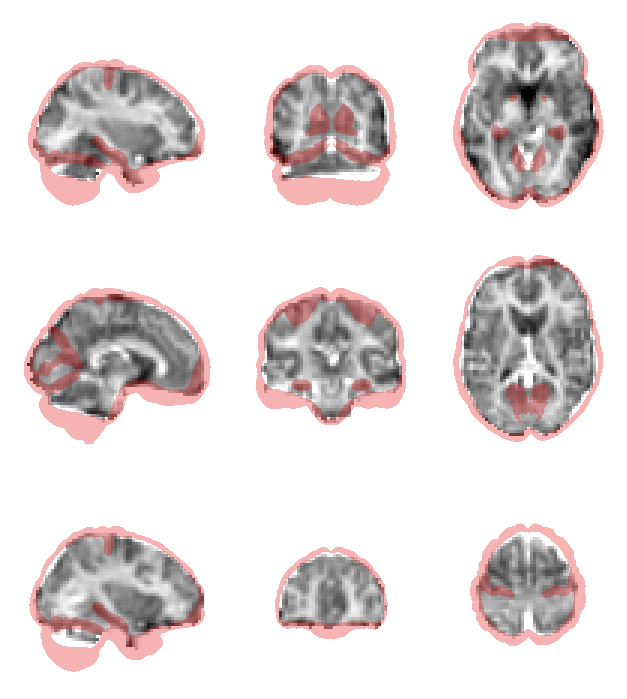

In [14]:
%% Add overlay 
clear jin jout jopt
jin.background =[path_root 'template_layout/test_data/X_0015002/func_X_0015002_mean_stereonl.png'];
jin.overlay = [path_root 'template_layout/layout/mask_layout/mask_all_layout_v2_smoothed.png'];
jout = [path_root 'template_layout/test_data/X_0015002/func_X_0015002_mean_stereonl_outline.png'];
jopt.transparency = 0.7 ;
jopt.threshold = 0.9;
niak_brick_add_overlay(jin,jout,jopt);
imshow(jout)

# Mask anatomical head backgroud 

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


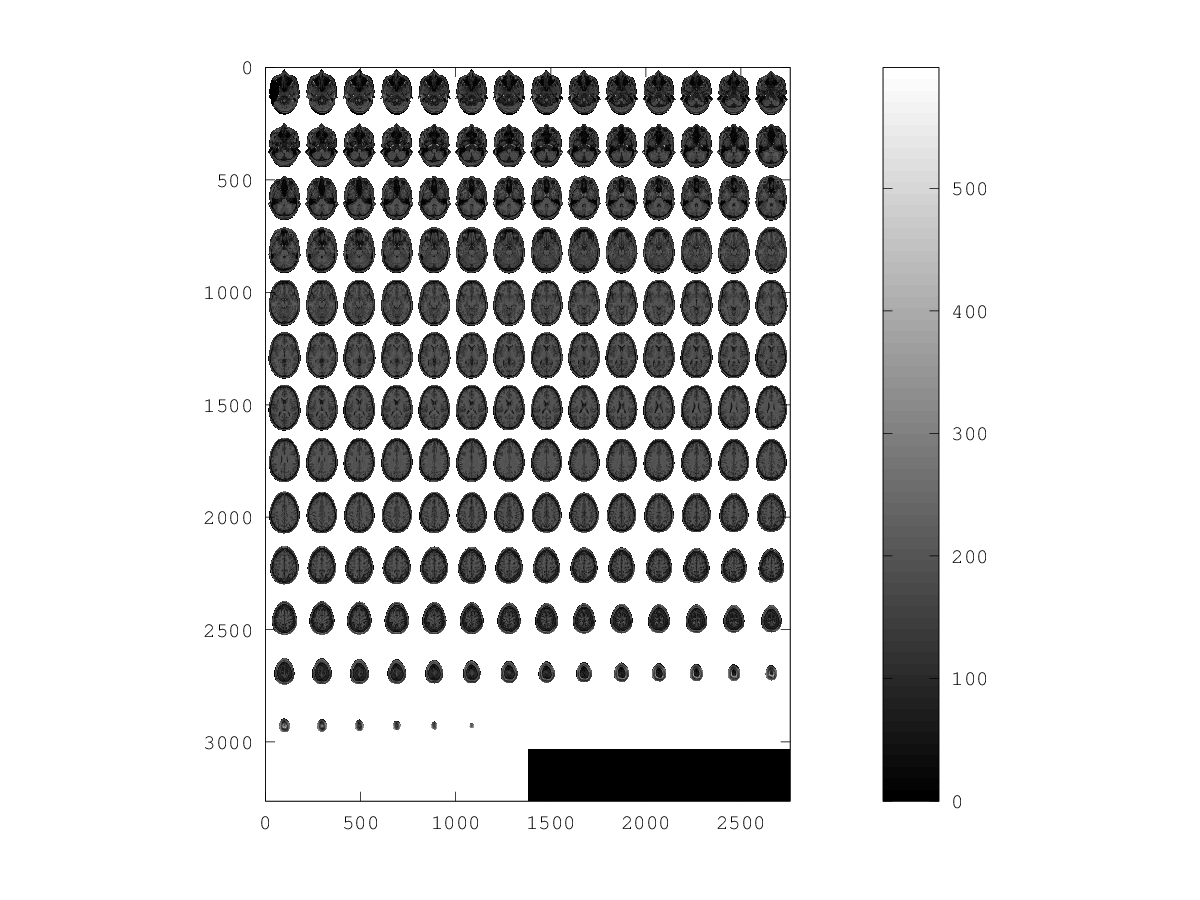

In [48]:
# mask background
niak_gb_vars
[hdr,vol] = niak_read_vol('/home/yassinebha/tmp/HCP139839/anat_HCP139839_nuc_stereonl.mnc.gz');
[hdr,mask] = niak_read_vol([ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_asym_09a_headmask.mnc.gz']);

mask = mask>0;
vol(~mask) = max(vol(:));
opt.type_color = 'gray';
niak_montage(vol,opt)
hdr.file_name = ['/home/yassinebha/tmp/HCP139839/anat_HCP139839_nuc_stereonl_white.mnc.gz'];
niak_write_vol(hdr,vol);

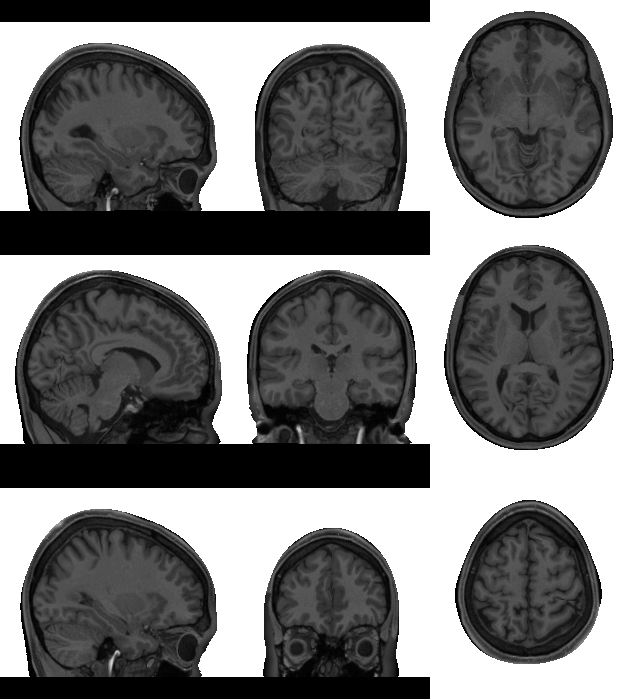

In [33]:
% Create montage for the image
clear jin jout jopt
% Input
jin.source = ['/home/yassinebha/tmp/HCP139839/anat_HCP139839_nuc_stereonl_white.mnc.gz'];
jin.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_sym_09a.mnc.gz'];

% Output
jout = '/home/yassinebha/tmp/HCP139839/anat_HCP139839_nuc_stereonl_white.png';

% Options
jopt.colormap = 'gray';
jopt.colorbar = false;
jopt.limits = 'adaptative';
jopt.flag_decoration = false;
jopt.padding = true;
jopt.coord =[-30 , -65 , -6 ; 
             -8 , -25 ,  10 ;  
             30 ,  45 ,  60];
             
% The generation of the montage itself
niak_brick_vol2img(jin,jout,jopt);
imshow(jout)

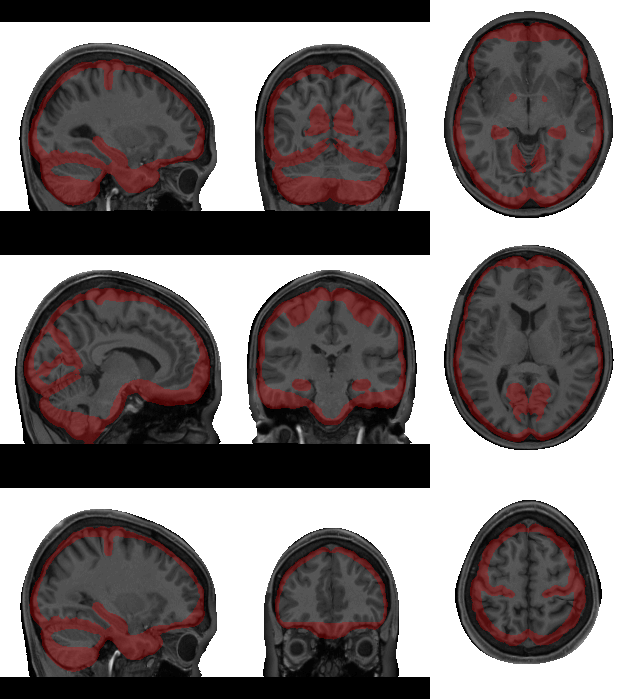

In [34]:
%% Add func-overlay to anat subject 
clear jin jout jopt
param.transparency = 0.7;
jin.background =  '/home/yassinebha/tmp/HCP139839/anat_HCP139839_nuc_stereonl_white.png';
jin.overlay = [path_root 'template_layout/layout/mask_layout/mask_all_layout_v2_smoothed.png'];
jout = '/home/yassinebha/tmp/HCP139839/anat_HCP139839_nuc_stereonl_white_func_outline.png';
jopt.transparency = param.transparency;
jopt.threshold = 0.9;
niak_brick_add_overlay(jin,jout,jopt);
imshow(jout)

# Invert a subject BOLD contrast including head in the mask

In [29]:
## invert subject func image
# Alpply non uniformity corretion first
clear  files_in files_out opt
files_in.vol = '/home/yassinebha/tmp/HCP139839/func_HCP139839_mean_stereonl.mnc.gz';
files_in.mask = '/home/yassinebha/tmp/HCP139839/func_mask_group_stereonl.mnc.gz';
files_out.vol_nu = '';
files_out.vol_imp = '';
opt.folder_out =  '/home/yassinebha/tmp/HCP139839';
[files_in,files_out,opt] = niak_brick_nu_correct(files_in,files_out,opt);


*****************************************
Non-uniformity correction on an MR volume
*****************************************
Running NU_CORRECT with the following command:
nu_correct -clobber -tmpdir /tmp/niak_tmp_455581701_func_HCP139839_mean_stereonl/ -distance 200 -mask /home/yassinebha/tmp/HCP139839/func_mask_group_stereonl.mnc.gz /home/yassinebha/tmp/HCP139839/func_HCP139839_mean_stereonl.mnc.gz /tmp/niak_tmp_455581701_func_HCP139839_mean_stereonl/vol_nu.mnc

Transforming slices:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Number of 

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


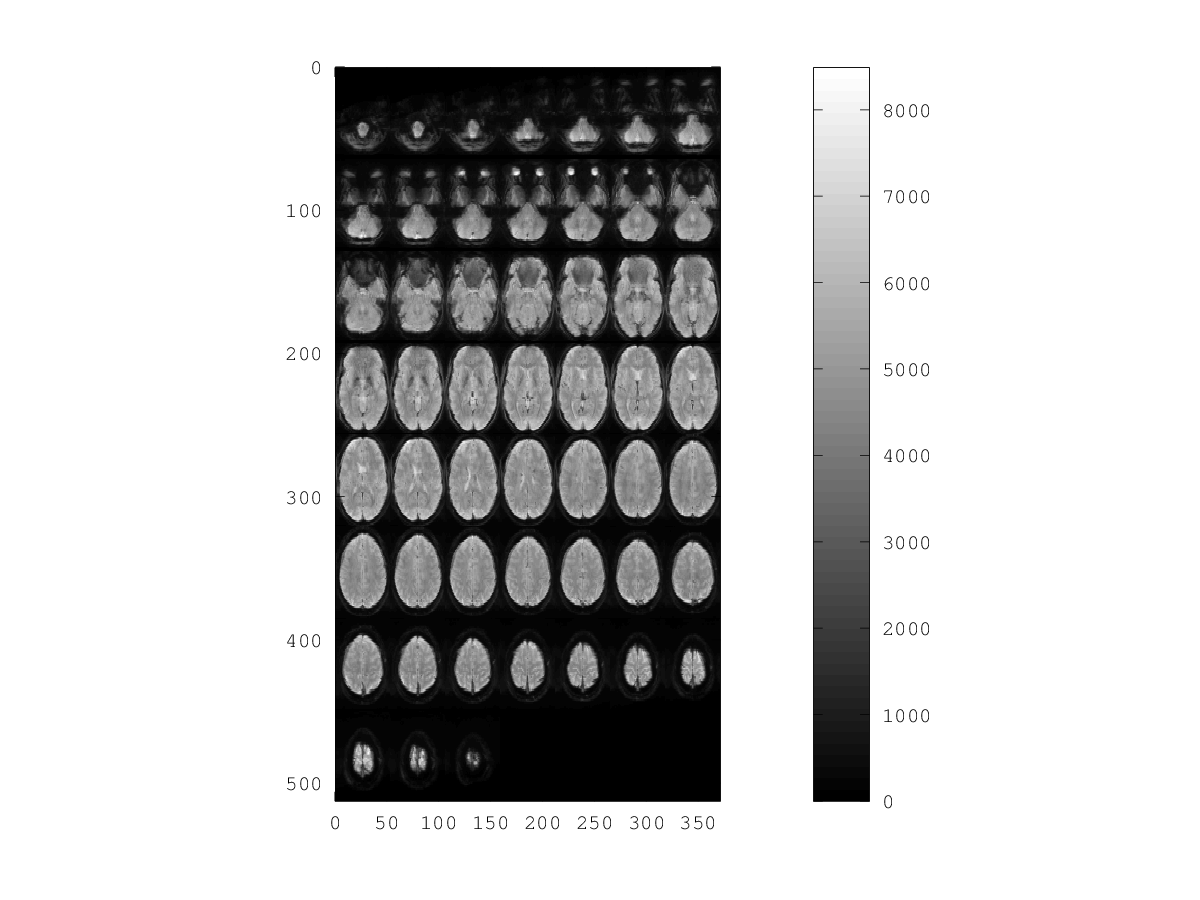

In [30]:
# Dispaly images
[hdr,vol] = niak_read_vol(files_out.vol_nu);
[hdr,vol_raw] = niak_read_vol(files_in.vol);
opt.type_color = 'gray';
niak_montage(vol_raw,opt)

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


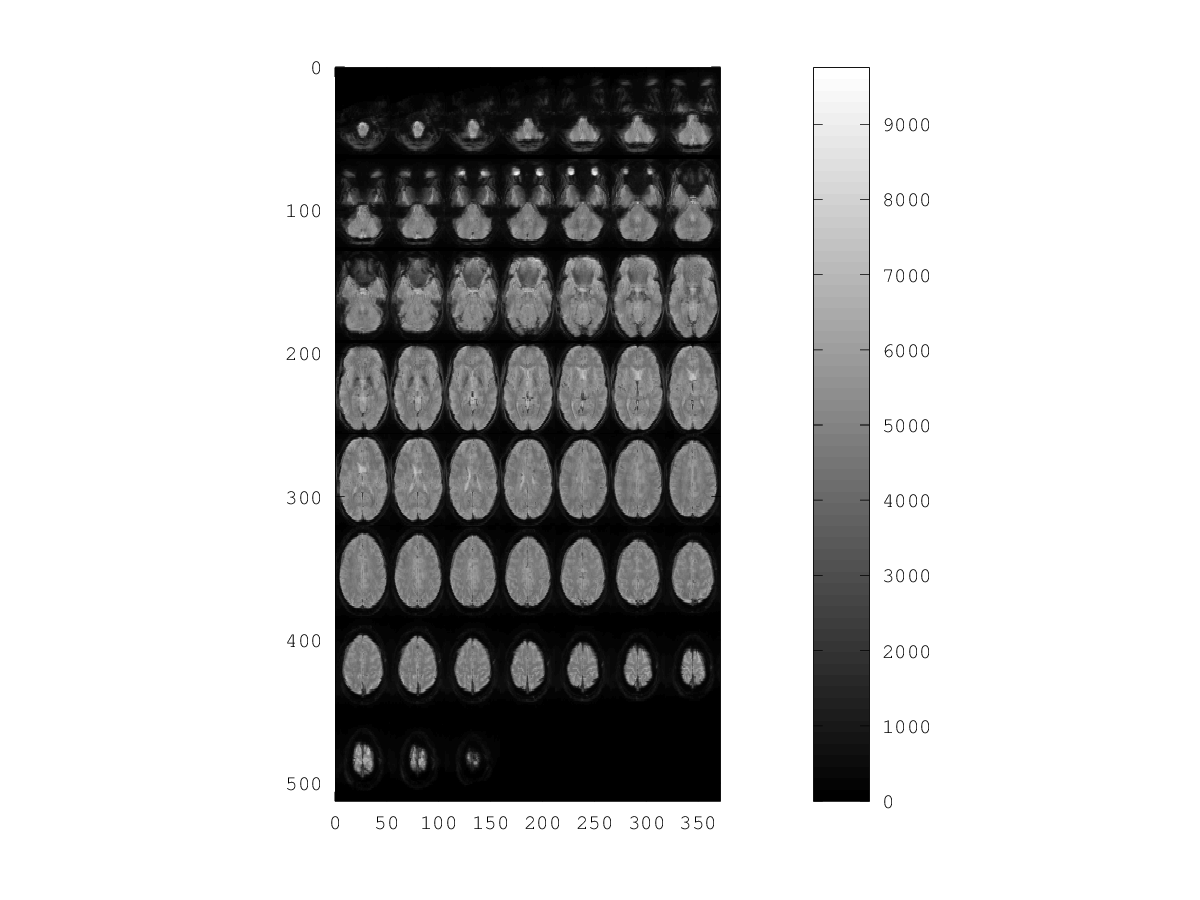

In [31]:
# After correction
niak_montage(vol,opt)

In [34]:
%% resample func to head mask
clear opt
niak_gb_vars
in.source = '/home/yassinebha/tmp/HCP139839/func_HCP139839_mean_stereonl.mnc.gz';
in.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_asym_09a_headmask.mnc.gz'];
out = '/home/yassinebha/tmp/HCP139839/func_HCP139839_mean_stereonl_nu_resamp.mnc.gz';
opt.interpolation = 'nearest_neighbour';
#opt.flag_tfm_space = true;
niak_brick_resample_vol(in,out,opt);


 Reading source volume information /home/yassinebha/tmp/HCP139839/func_HCP139839_mean_stereonl.mnc.gz ...

 Reading target volume information /home/yassinebha/git/niak//template/mni-models_icbm152-nl-2009-1.0/mni_icbm152_t1_tal_nlin_asym_09a_headmask.mnc.gz ...

 Resampling source on target ...
Transforming slices:.............................................................................................................................................................................................Done
Cleaning temporary files
Done!


In [35]:
system([ 'register ' out ' ' in.target ' &'])

ans = 0


    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


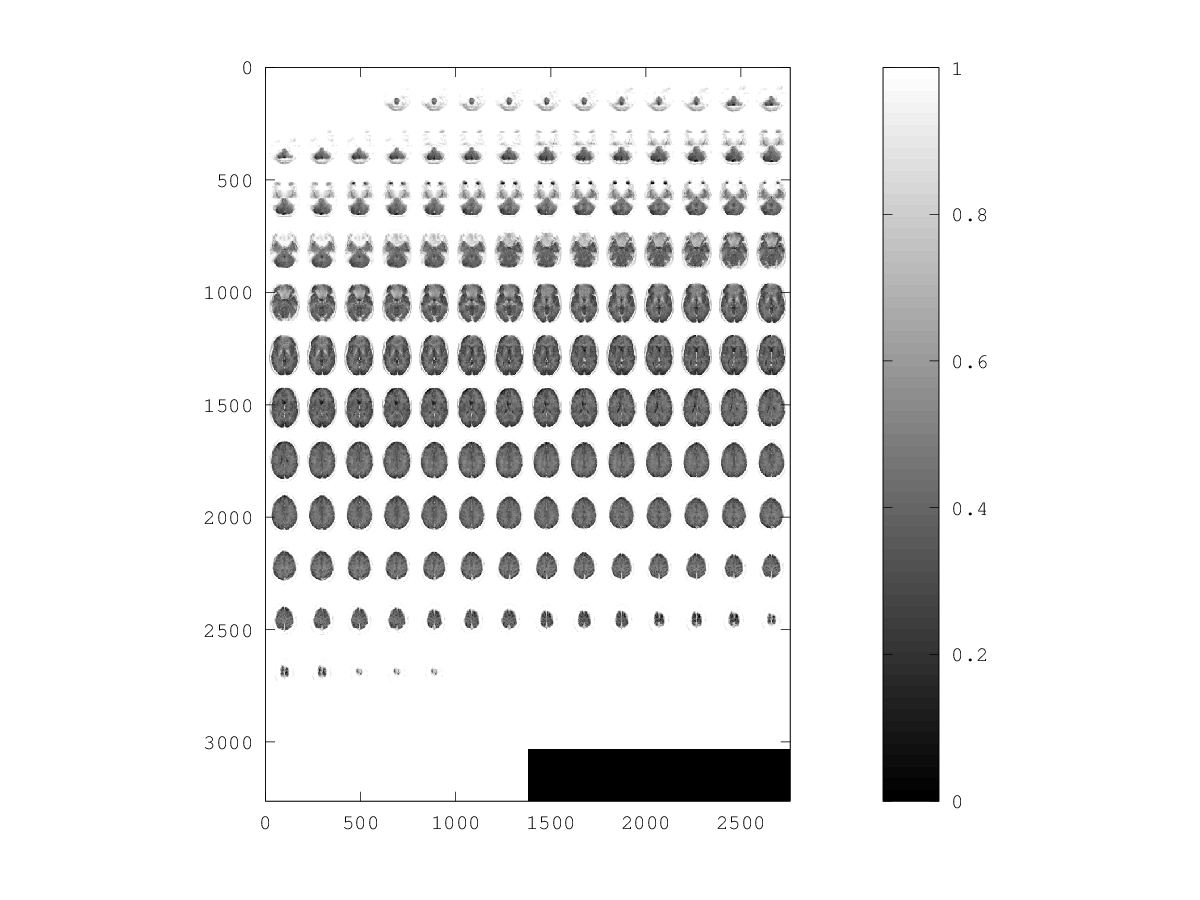

In [45]:
%% Invert contrast
[hdr,vol] = niak_read_vol(out);
[hdr,mask] = niak_read_vol(in.target);
param.perc_min = 0.2;
param.perc_max = 0.9999;

mask = mask>0;
val = sort(vol(mask),'ascend');
vmin = val(round(param.perc_min*length(val)));
vmax = val(round(param.perc_max*length(val)));
vol(vol<vmin) = vmin;
vol(vol>vmax) = vmax;
vol(mask) = (vol(mask) - vmin)/(vmax-vmin);
vol(~mask) = 0;
vol = 1 - vol;
vol = (abs(vol));
hdr.file_name =  '/home/yassinebha/tmp/HCP139839/func_HCP139839_mean_stereonl_inv.mnc.gz';
niak_write_vol(hdr,vol);

opt.type_color = 'gray';
niak_montage(vol,opt)

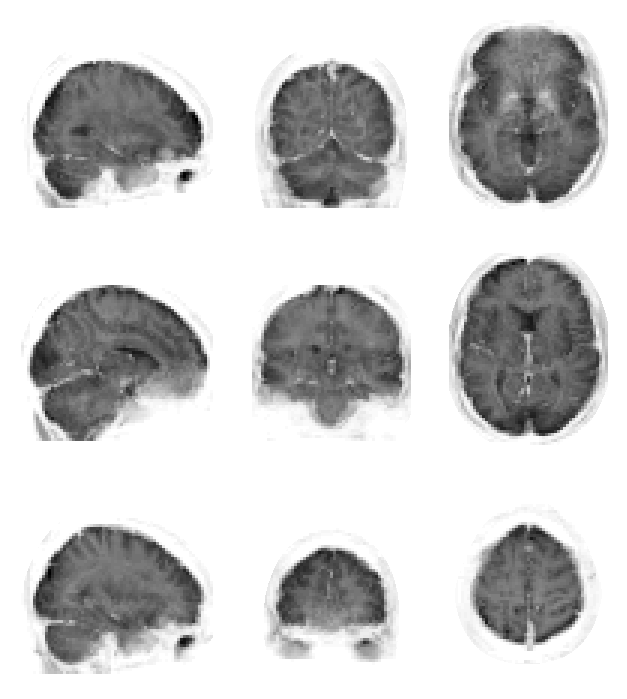

In [46]:
%% Create montage for the image
clear jin jout jopt
% Input
jin.source = '/home/yassinebha/tmp/HCP139839/func_HCP139839_mean_stereonl_inv.mnc.gz';
jin.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_sym_09a.mnc.gz'];

% Output
jout = '/home/yassinebha/tmp/HCP139839/func_HCP139839_mean_stereonl_inv.png';

% Options
jopt.colormap = 'gray';
jopt.colorbar = false;
jopt.limits = 'adaptative';
jopt.flag_decoration = false;
jopt.padding = true;
jopt.coord =[-30 , -65 , -6 ; 
             -8 , -25 ,  10 ;  
             30 ,  45 ,  60];
             
% The generation of the montage itself
niak_brick_vol2img(jin,jout,jopt);
imshow(jout)

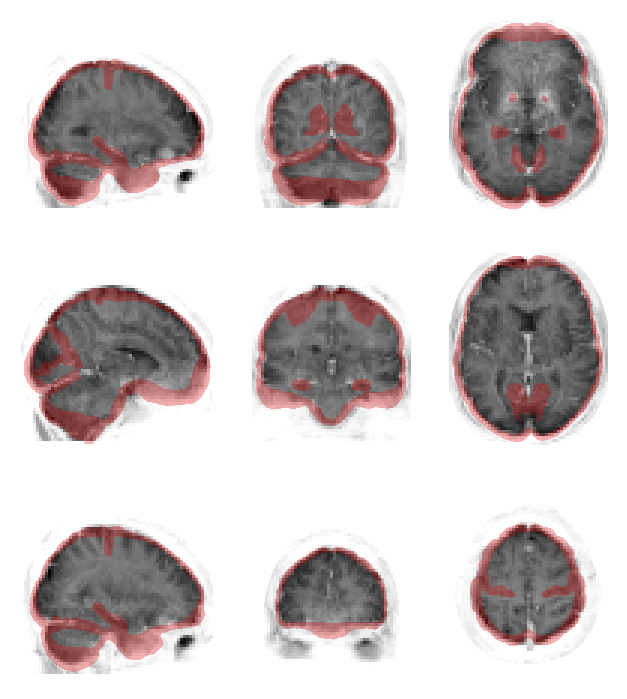

In [47]:
%% Add overlay 
clear jin jout jopt
jin.background ='/home/yassinebha/tmp/HCP139839/func_HCP139839_mean_stereonl_inv.png';
jin.overlay = [path_root 'template_layout/layout/mask_layout/mask_all_layout_v2_smoothed.png'];
jout = '/home/yassinebha/tmp/HCP139839/func_HCP139839_mean_stereonl_inv_outline.png';
jopt.transparency = 0.7 ;
jopt.threshold = 0.9;
niak_brick_add_overlay(jin,jout,jopt);
imshow(jout)